In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
application_train = pd.read_csv('file:///D:/数据/Kaggle/HomeCredit/application_train.csv')


In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [5]:
application_train.dtypes[application_train.dtypes!=object]


SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

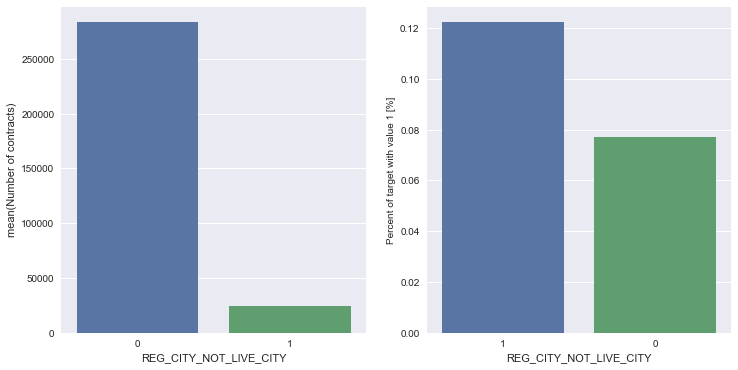

In [9]:
plot_stats('REG_CITY_NOT_LIVE_CITY')

In [15]:
#print(application_train.AMT_INCOME_TOTAL.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].AMT_CREDIT.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].AMT_CREDIT.describe())

#低易违约，关系弱

Default 1
count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

Not Default 0
count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [16]:
print('Default 1')
print(application_train[application_train.TARGET==1].AMT_INCOME_TOTAL.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].AMT_INCOME_TOTAL.describe())

##收入低易违约 关系弱  max  1.170000e+08 分类变量

Default 1
count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Not Default 0
count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64


In [17]:
print('Default 1')
print(application_train[application_train.TARGET==1].AMT_ANNUITY.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].AMT_ANNUITY.describe())

#养老金低易违约，关系弱，但最高违约直到150000，可以考虑分类变量

Default 1
count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

Not Default 0
count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [18]:
print('Default 1')
print(application_train[application_train.TARGET==1].AMT_GOODS_PRICE.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].AMT_GOODS_PRICE.describe())

#Gooods 低易违约 

Default 1
count    2.480400e+04
mean     4.889724e+05
std      3.116365e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Not Default 0
count    2.824290e+05
mean     5.427368e+05
std      3.737855e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [19]:
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_BIRTH.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].DAYS_BIRTH.describe())

#出生日期短易违

Default 1
count    24825.000000
mean    -14884.828077
std       4192.844583
min     -25168.000000
25%     -18037.000000
50%     -14282.000000
75%     -11396.000000
max      -7678.000000
Name: DAYS_BIRTH, dtype: float64

Not Default 0
count    282686.000000
mean     -16138.176397
std        4364.200856
min      -25229.000000
25%      -19793.750000
50%      -15877.000000
75%      -12536.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


In [20]:
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_EMPLOYED.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].DAYS_EMPLOYED.describe())

#雇佣时间短易违约，但有不合理极小负值

Default 1
count     24825.000000
mean      42394.675448
std      119484.634253
min      -16069.000000
25%       -2156.000000
50%       -1034.000000
75%        -379.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Not Default 0
count    282686.000000
mean      65696.146123
std      142877.810161
min      -17912.000000
25%       -2813.000000
50%       -1235.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [21]:
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_REGISTRATION.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].DAYS_REGISTRATION.describe())

#低的人（注册时间短）易违约

Default 1
count    24825.000000
mean     -4487.127009
std       3299.650241
min     -22928.000000
25%      -6646.000000
50%      -4056.000000
75%      -1671.000000
max          0.000000
Name: DAYS_REGISTRATION, dtype: float64

Not Default 0
count    282686.000000
mean      -5029.941065
std        3538.464478
min      -24672.000000
25%       -7550.000000
50%       -4544.000000
75%       -2045.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


In [25]:
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_ID_PUBLISH.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].DAYS_ID_PUBLISH.describe())

#短易违约

Default 1
count    24825.000000
mean     -2732.099617
std       1516.975313
min      -6207.000000
25%      -4119.000000
50%      -2797.000000
75%      -1392.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Not Default 0
count    282686.000000
mean      -3017.219788
std        1506.614090
min       -7197.000000
25%       -4313.000000
50%       -3295.000000
75%       -1755.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


# Part 2 

In [26]:
print('Default 1')
print(application_train[application_train.TARGET==1].FLAG_MOBIL.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].FLAG_MOBIL.describe())

#可丢弃 FLAG_MOBIL，FLAG_CONT_MOBILE，FLAG_EMAIL

Default 1
count    24825.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: FLAG_MOBIL, dtype: float64

Not Default 0
count    282686.000000
mean          0.999996
std           0.001881
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64


In [27]:
print('Default 1')
print(application_train[application_train.TARGET==1].FLAG_EMP_PHONE.describe())
print()
print('Not Default 0')
print( application_train[application_train.TARGET!=1].FLAG_EMP_PHONE.describe())

#有差异 违约人数中1的多

Default 1
count    24825.000000
mean         0.879517
std          0.325532
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FLAG_EMP_PHONE, dtype: float64

Not Default 0
count    282686.000000
mean          0.814653
std           0.388579
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64


In [28]:
print(application_train.FLAG_WORK_PHONE.value_counts())
print(application_train[application_train.TARGET==1].FLAG_WORK_PHONE.describe())
print(application_train[application_train.TARGET!=1].FLAG_WORK_PHONE.describe())

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64
count    24825.000000
mean         0.237825
std          0.425760
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FLAG_WORK_PHONE, dtype: float64
count    282686.000000
mean          0.195991
std           0.396963
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64


In [29]:
print(application_train.FLAG_PHONE.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].FLAG_PHONE.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].FLAG_PHONE.describe())

0    221080
1     86431
Name: FLAG_PHONE, dtype: int64
Default 1
count    24825.000000
mean         0.244955
std          0.430069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FLAG_PHONE, dtype: float64

Not Default 0
count    282686.000000
mean          0.284238
std           0.451051
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64


In [30]:
print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].HOUR_APPR_PROCESS_START.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].HOUR_APPR_PROCESS_START.describe())

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
Default 1
count    24825.000000
mean        11.797100
std          3.284299
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

Not Default 0
count    282686.000000
mean         12.086807
std           3.263173
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


In [5]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].REGION_POPULATION_RELATIVE.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].REGION_POPULATION_RELATIVE.describe())

Default 1
count    24825.000000
mean         0.019131
std          0.011905
min          0.000533
25%          0.009630
50%          0.018634
75%          0.025164
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

Not Default 0
count    282686.000000
mean          0.021021
std           0.013978
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


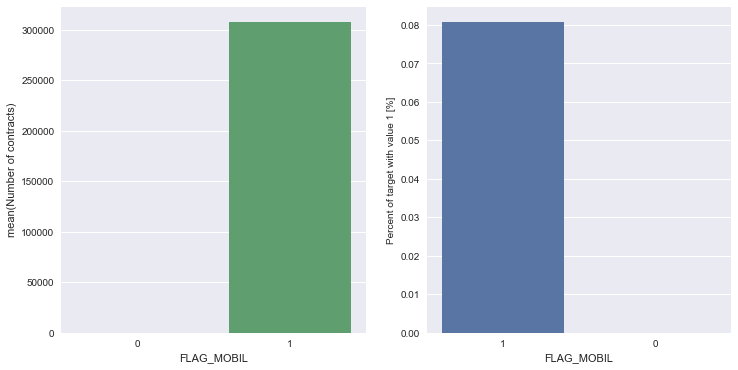

In [9]:
plot_stats('FLAG_MOBIL')

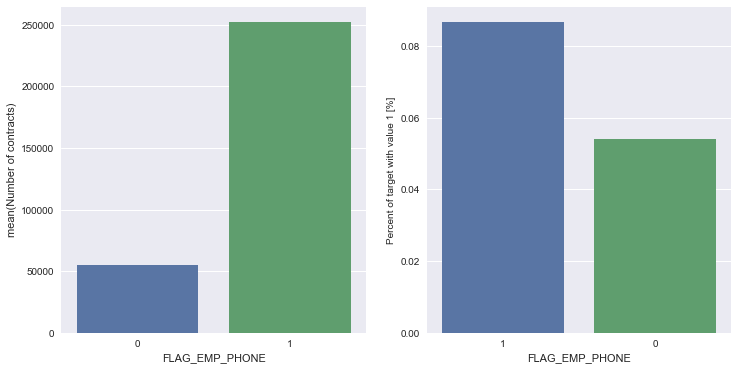

In [10]:
plot_stats('FLAG_EMP_PHONE')

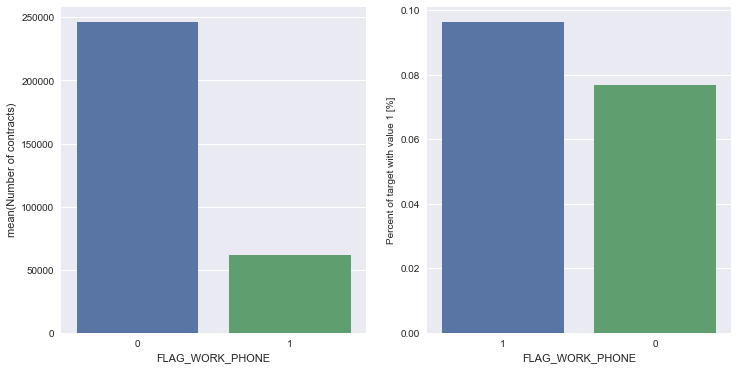

In [11]:
plot_stats('FLAG_WORK_PHONE')

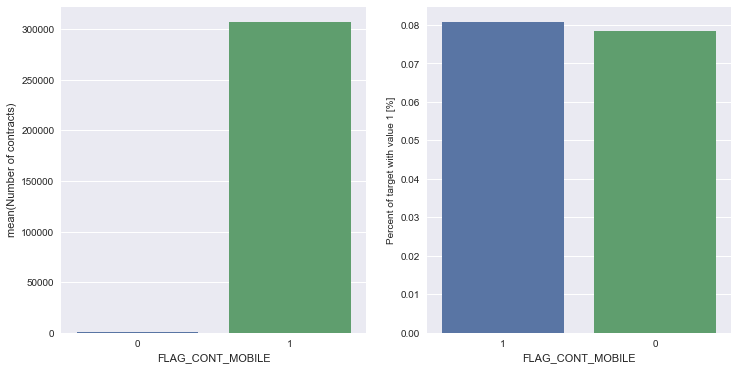

In [12]:
plot_stats('FLAG_CONT_MOBILE')

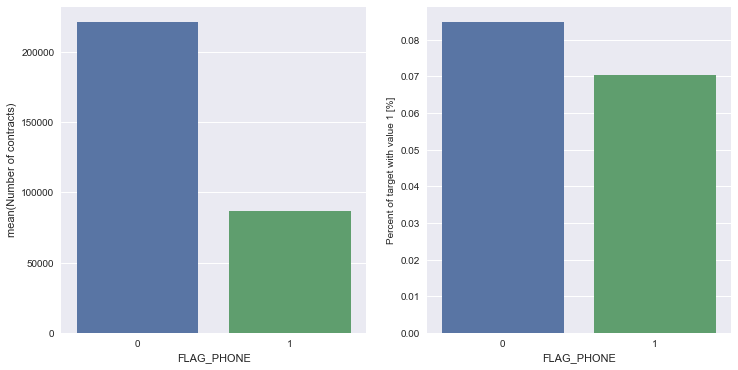

In [13]:
plot_stats('FLAG_PHONE')

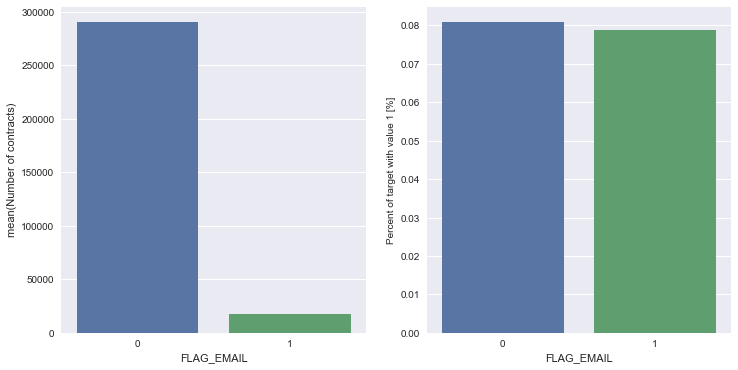

In [14]:
plot_stats('FLAG_EMAIL')

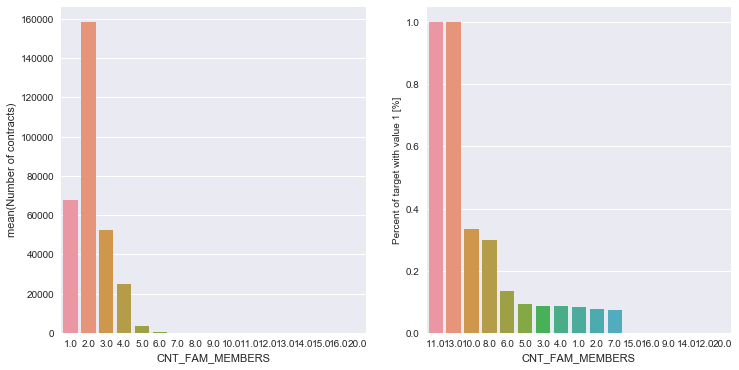

In [15]:
plot_stats('CNT_FAM_MEMBERS')

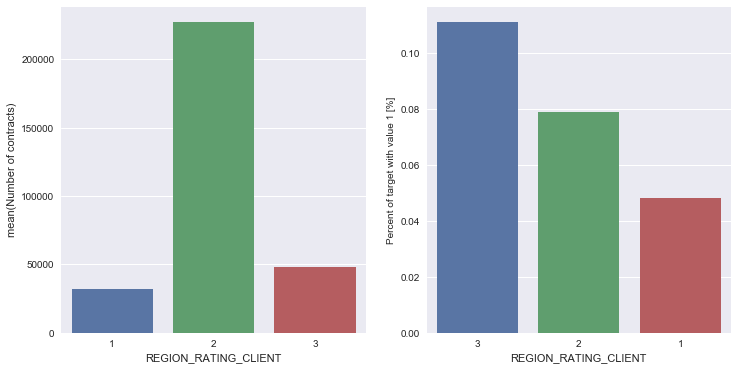

In [16]:
plot_stats('REGION_RATING_CLIENT')

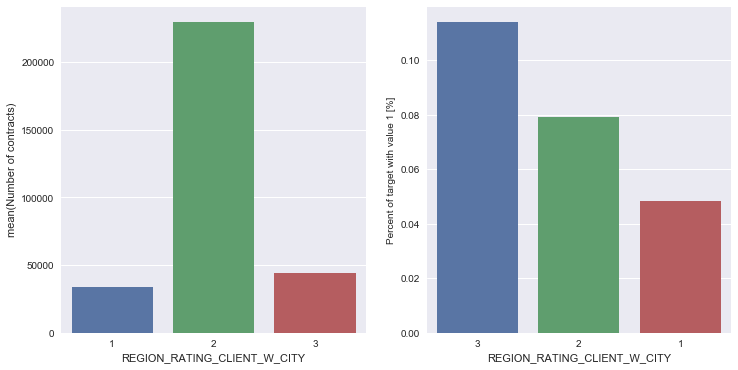

In [17]:
plot_stats('REGION_RATING_CLIENT_W_CITY')

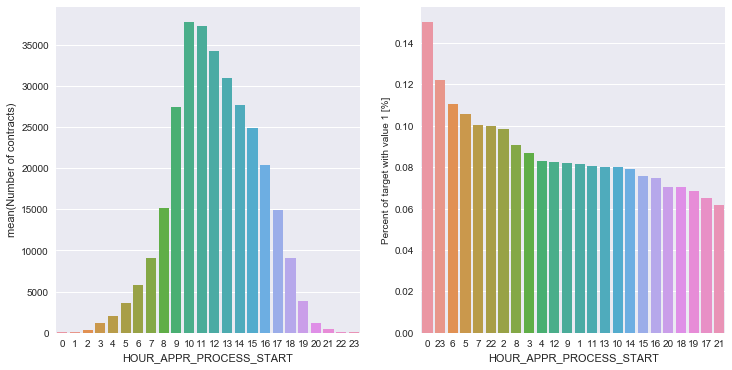

In [18]:
plot_stats('HOUR_APPR_PROCESS_START')

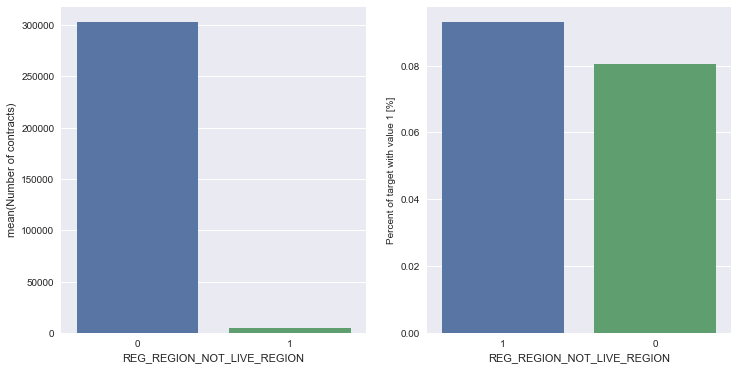

In [19]:
plot_stats('REG_REGION_NOT_LIVE_REGION')

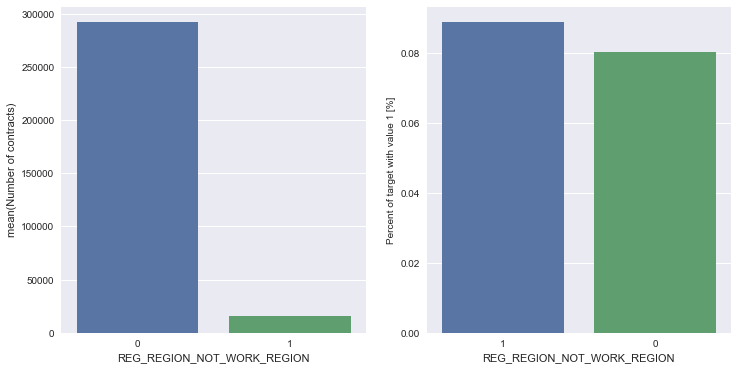

In [20]:
plot_stats('REG_REGION_NOT_WORK_REGION')

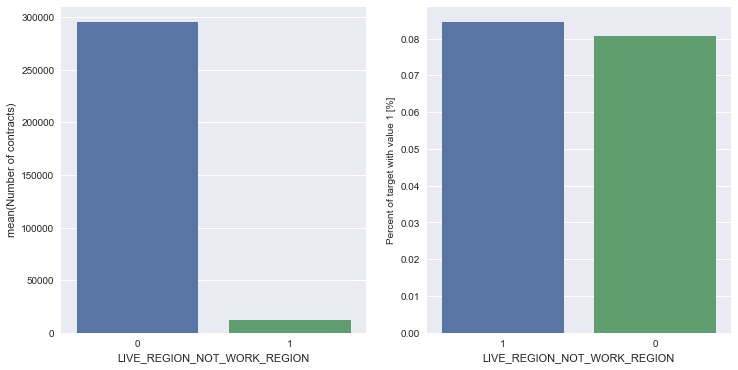

In [21]:
plot_stats('LIVE_REGION_NOT_WORK_REGION')

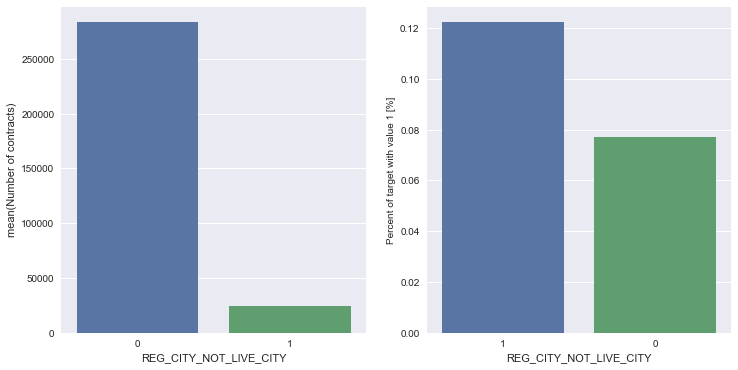

In [22]:
plot_stats('REG_CITY_NOT_LIVE_CITY')

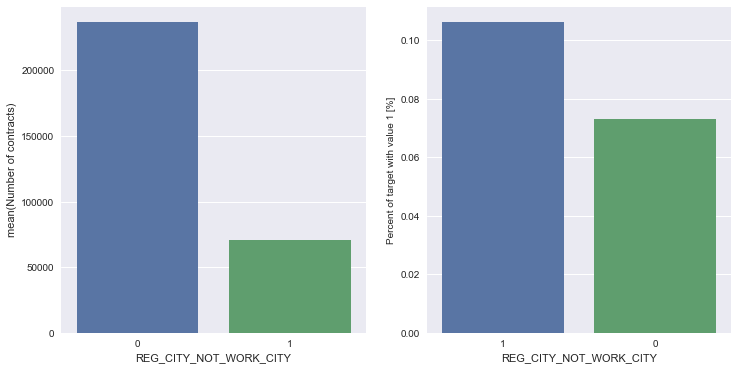

In [23]:
plot_stats('REG_CITY_NOT_WORK_CITY')

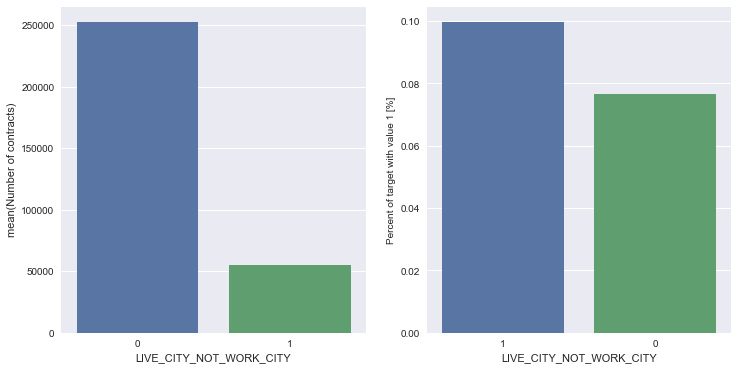

In [24]:
plot_stats('LIVE_CITY_NOT_WORK_CITY')

In [25]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].EXT_SOURCE_1.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].EXT_SOURCE_1.describe())

Default 1
count    10054.000000
mean         0.386968
std          0.204729
min          0.014691
25%          0.221847
50%          0.361675
75%          0.537508
max          0.929394
Name: EXT_SOURCE_1, dtype: float64

Not Default 0
count    124079.000000
mean          0.511461
std           0.208804
min           0.014568
25%           0.345430
50%           0.517452
75%           0.682839
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


In [26]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].EXT_SOURCE_2.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].EXT_SOURCE_2.describe())

Default 1
count    24773.000000
mean         0.410935
std          0.213107
min          0.000005
25%          0.238568
50%          0.440381
75%          0.594190
max          0.811870
Name: EXT_SOURCE_2, dtype: float64

Not Default 0
count    2.820780e+05
mean     5.234787e-01
std      1.862767e-01
min      8.173617e-08
25%      4.097866e-01
50%      5.739047e-01
75%      6.677051e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


In [27]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].EXT_SOURCE_3.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].EXT_SOURCE_3.describe())

Default 1
count    19148.000000
mean         0.390717
std          0.205810
min          0.000527
25%          0.223831
50%          0.379100
75%          0.553165
max          0.896010
Name: EXT_SOURCE_3, dtype: float64

Not Default 0
count    227398.000000
mean          0.520969
std           0.190465
min           0.000527
25%           0.385915
50%           0.546023
75%           0.673830
max           0.893976
Name: EXT_SOURCE_3, dtype: float64


In [28]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].APARTMENTS_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].APARTMENTS_AVG.describe())

Default 1
count    10540.000000
mean         0.105766
std          0.100959
min          0.000000
25%          0.041200
50%          0.082500
75%          0.133000
max          1.000000
Name: APARTMENTS_AVG, dtype: float64

Not Default 0
count    140910.000000
mean          0.118314
std           0.108715
min           0.000000
25%           0.058800
50%           0.088700
75%           0.148500
max           1.000000
Name: APARTMENTS_AVG, dtype: float64


In [29]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].BASEMENTAREA_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].BASEMENTAREA_AVG.describe())

Default 1
count    8787.000000
mean        0.081548
std         0.074289
min         0.000000
25%         0.039900
50%         0.072300
75%         0.106100
max         1.000000
Name: BASEMENTAREA_AVG, dtype: float64

Not Default 0
count    118781.000000
mean          0.088952
std           0.082987
min           0.000000
25%           0.044500
50%           0.076500
75%           0.112500
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


In [30]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].YEARS_BEGINEXPLUATATION_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].YEARS_BEGINEXPLUATATION_AVG.describe())

Default 1
count    11017.000000
mean         0.975634
std          0.069148
min          0.000000
25%          0.976200
50%          0.981100
75%          0.986100
max          1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

Not Default 0
count    146487.000000
mean          0.977893
std           0.058406
min           0.000000
25%           0.976700
50%           0.982100
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


In [32]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].YEARS_BUILD_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].YEARS_BUILD_AVG.describe())

Default 1
count    7074.000000
mean        0.743231
std         0.112389
min         0.000000
25%         0.680400
50%         0.748400
75%         0.816400
max         1.000000
Name: YEARS_BUILD_AVG, dtype: float64

Not Default 0
count    95949.000000
mean         0.753153
std          0.113316
min          0.000000
25%          0.687200
50%          0.755200
75%          0.823200
max          1.000000
Name: YEARS_BUILD_AVG, dtype: float64


In [33]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].COMMONAREA_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].COMMONAREA_AVG.describe())

Default 1
count    6402.000000
mean        0.039444
std         0.066716
min         0.000000
25%         0.007300
50%         0.018600
75%         0.046700
max         1.000000
Name: COMMONAREA_AVG, dtype: float64

Not Default 0
count    86244.000000
mean         0.045005
std          0.076669
min          0.000000
25%          0.007900
50%          0.021300
75%          0.051800
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


In [34]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].ELEVATORS_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].ELEVATORS_AVG.describe())

Default 1
count    9910.000000
mean        0.062036
std         0.119132
min         0.000000
25%         0.000000
50%         0.000000
75%         0.080000
max         1.000000
Name: ELEVATORS_AVG, dtype: float64

Not Default 0
count    133710.000000
mean          0.080194
std           0.135567
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


In [37]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].FLOORSMIN_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].FLOORSMIN_AVG.describe())

Default 1
count    6817.00000
mean        0.21196
std         0.14873
min         0.00000
25%         0.08330
50%         0.20830
75%         0.31920
max         1.00000
Name: FLOORSMIN_AVG, dtype: float64

Not Default 0
count    92052.000000
mean         0.233370
std          0.162181
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


In [36]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].FLOORSMAX_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].FLOORSMAX_AVG.describe())

Default 1
count    10761.000000
mean         0.203021
std          0.134414
min          0.000000
25%          0.125000
50%          0.166700
75%          0.333300
max          1.000000
Name: FLOORSMAX_AVG, dtype: float64

Not Default 0
count    143730.000000
mean          0.228023
std           0.145228
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


In [38]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].LANDAREA_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].LANDAREA_AVG.describe())

Default 1
count    8721.000000
mean        0.063108
std         0.080903
min         0.000000
25%         0.017800
50%         0.044900
75%         0.080800
max         1.000000
Name: LANDAREA_AVG, dtype: float64

Not Default 0
count    116200.000000
mean          0.066575
std           0.081200
min           0.000000
25%           0.018800
50%           0.048400
75%           0.085900
max           1.000000
Name: LANDAREA_AVG, dtype: float64


In [39]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].LIVINGAPARTMENTS_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].LIVINGAPARTMENTS_AVG.describe())

Default 1
count    6703.000000
mean        0.092255
std         0.087500
min         0.000000
25%         0.045400
50%         0.067200
75%         0.116800
max         1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64

Not Default 0
count    90609.000000
mean         0.101405
std          0.092910
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


In [40]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].LIVINGAREA_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].LIVINGAREA_AVG.describe())

Default 1
count    10714.000000
mean         0.094096
std          0.100576
min          0.000000
25%          0.035525
50%          0.066700
75%          0.113800
max          1.000000
Name: LIVINGAREA_AVG, dtype: float64

Not Default 0
count    142447.000000
mean          0.108400
std           0.111216
min           0.000000
25%           0.046100
50%           0.075200
75%           0.131800
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


In [41]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].NONLIVINGAPARTMENTS_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].NONLIVINGAPARTMENTS_AVG.describe())

Default 1
count    6498.000000
mean        0.008252
std         0.046621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003900
max         1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64

Not Default 0
count    87499.000000
mean         0.008850
std          0.047813
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


In [42]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].NONLIVINGAREA_AVG.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].NONLIVINGAREA_AVG.describe())

Default 1
count    9495.000000
mean        0.024887
std         0.062371
min         0.000000
25%         0.000000
50%         0.002800
75%         0.024500
max         1.000000
Name: NONLIVINGAREA_AVG, dtype: float64

Not Default 0
count    128334.000000
mean          0.028615
std           0.070017
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027900
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


In [45]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].YEARS_BUILD_MODE.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].YEARS_BUILD_MODE.describe())

Default 1
count    7074.000000
mean        0.750688
std         0.109280
min         0.000000
25%         0.686400
50%         0.755000
75%         0.817100
max         1.000000
Name: YEARS_BUILD_MODE, dtype: float64

Not Default 0
count    95949.000000
mean         0.760297
std          0.110144
min          0.000000
25%          0.699400
50%          0.764800
75%          0.830100
max          1.000000
Name: YEARS_BUILD_MODE, dtype: float64


In [7]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_BIRTH.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].DAYS_BIRTH.describe())

Default 1
count    24825.000000
mean    -14884.828077
std       4192.844583
min     -25168.000000
25%     -18037.000000
50%     -14282.000000
75%     -11396.000000
max      -7678.000000
Name: DAYS_BIRTH, dtype: float64

Not Default 0
count    282686.000000
mean     -16138.176397
std        4364.200856
min      -25229.000000
25%      -19793.750000
50%      -15877.000000
75%      -12536.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


In [8]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].OWN_CAR_AGE.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].OWN_CAR_AGE.describe())

Default 1
count    7576.000000
mean       13.668691
std        12.499074
min         0.000000
25%         6.000000
50%        11.000000
75%        17.000000
max        91.000000
Name: OWN_CAR_AGE, dtype: float64

Not Default 0
count    97006.000000
mean        11.935540
std         11.891359
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64


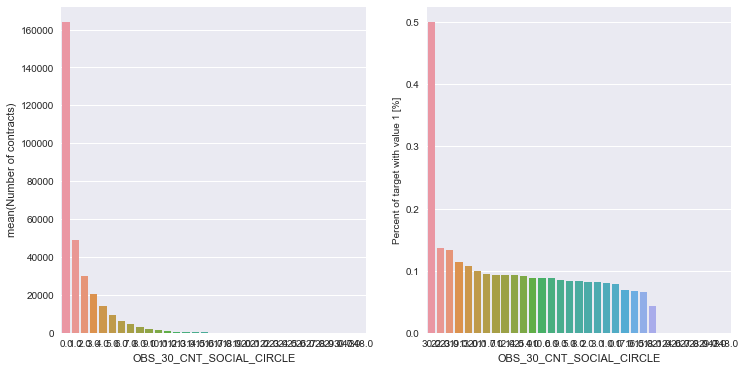

In [46]:
plot_stats('OBS_30_CNT_SOCIAL_CIRCLE')

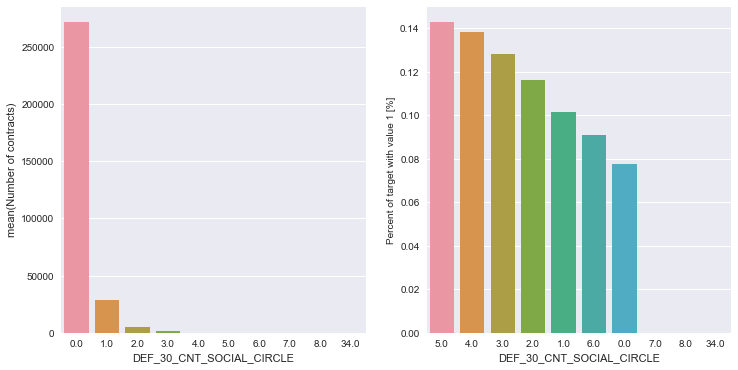

In [49]:
plot_stats('DEF_30_CNT_SOCIAL_CIRCLE')

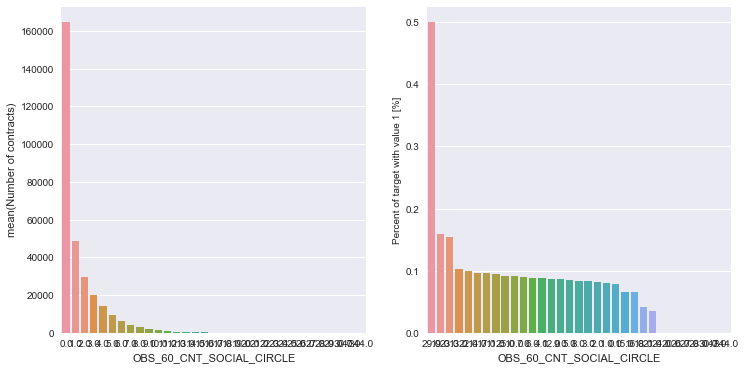

In [50]:
plot_stats('OBS_60_CNT_SOCIAL_CIRCLE')

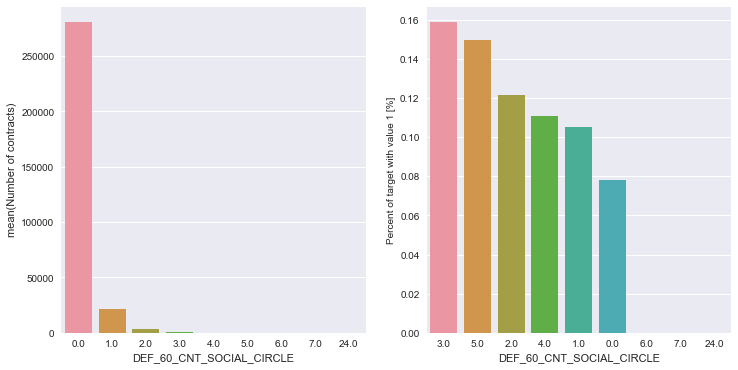

In [51]:
plot_stats('DEF_60_CNT_SOCIAL_CIRCLE')

In [52]:
#print(application_train.HOUR_APPR_PROCESS_START.value_counts())
print('Default 1')
print(application_train[application_train.TARGET==1].DAYS_LAST_PHONE_CHANGE.describe())
print()
print('Not Default 0')
print(application_train[application_train.TARGET!=1].DAYS_LAST_PHONE_CHANGE.describe())

Default 1
count    24825.000000
mean      -808.796818
std        758.090713
min      -4070.000000
25%      -1301.000000
50%       -594.000000
75%       -194.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Not Default 0
count    282685.000000
mean       -976.388294
std         831.210739
min       -4292.000000
25%       -1586.000000
50%        -776.000000
75%        -281.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [53]:
flag=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] 

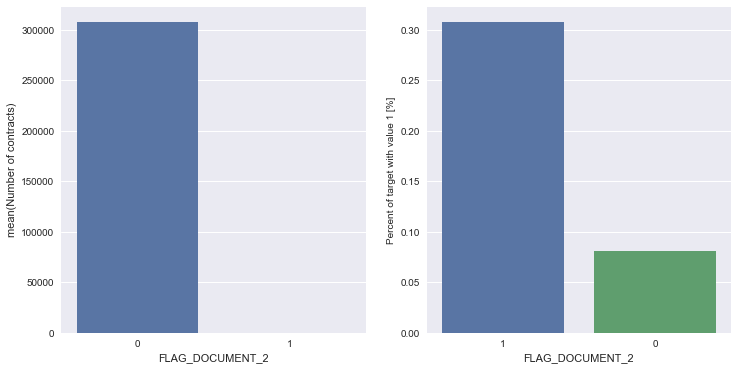

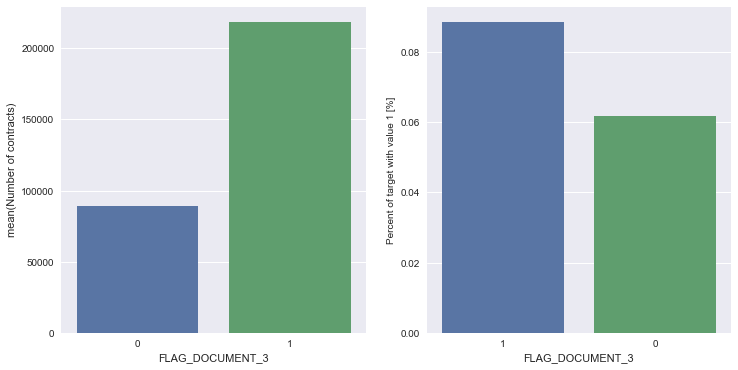

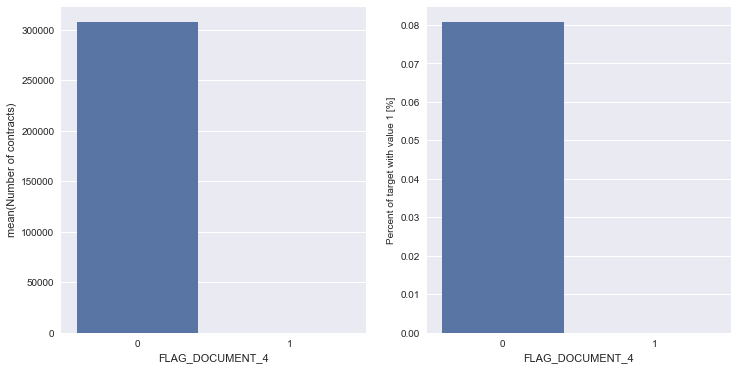

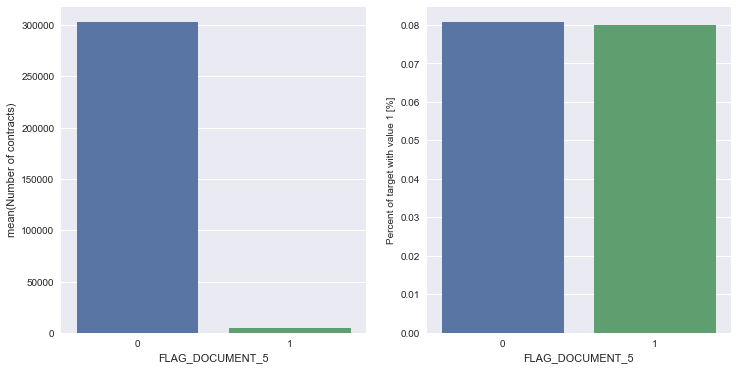

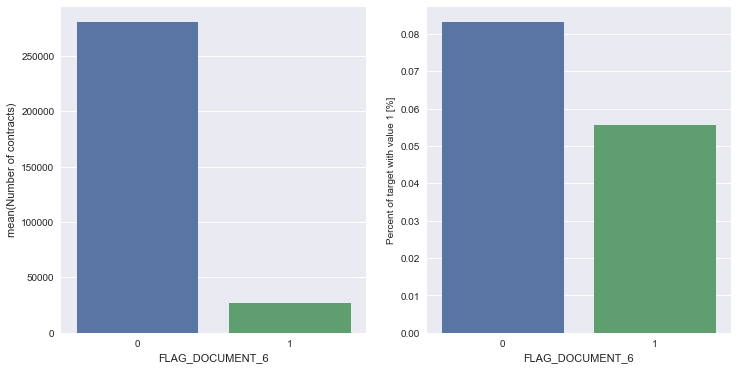

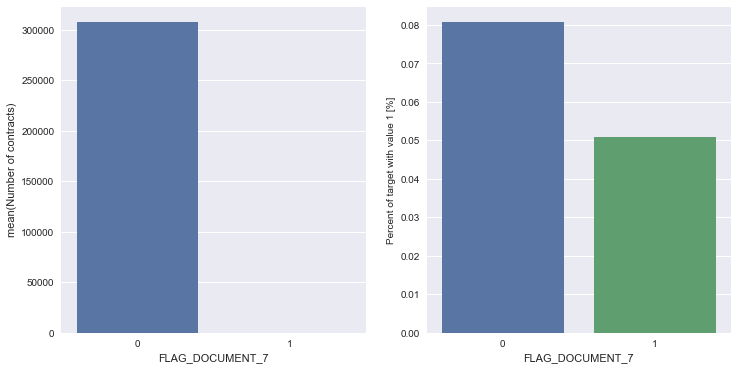

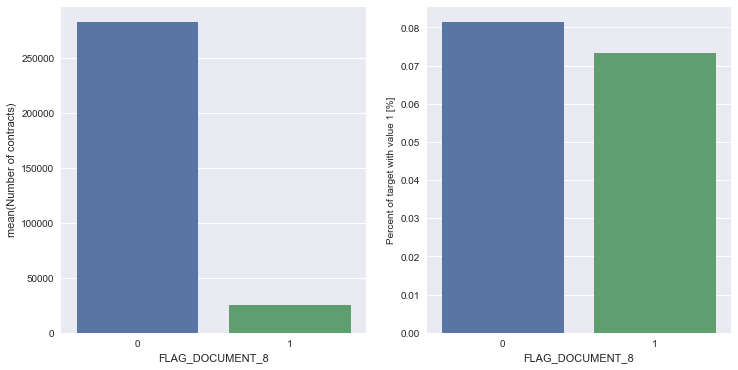

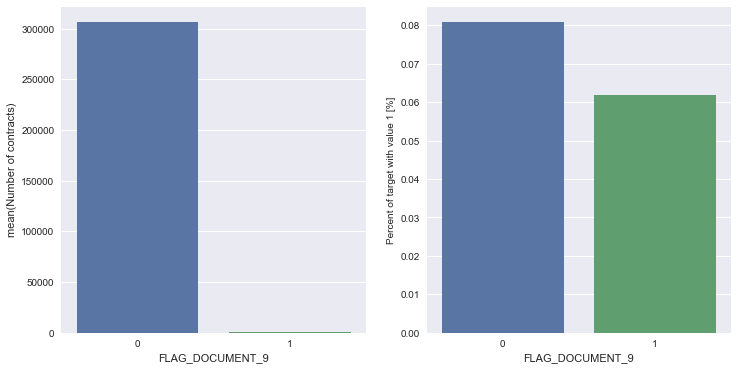

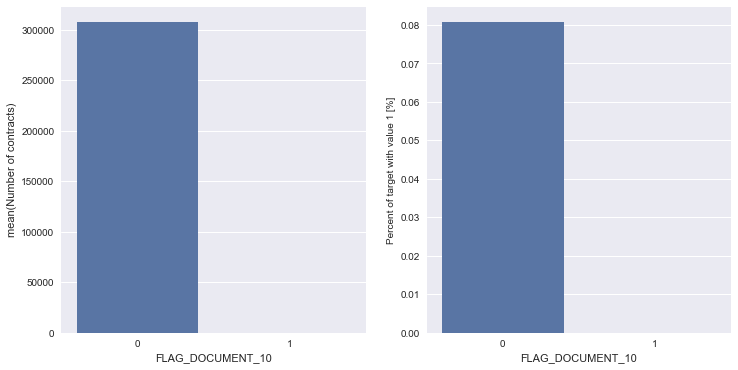

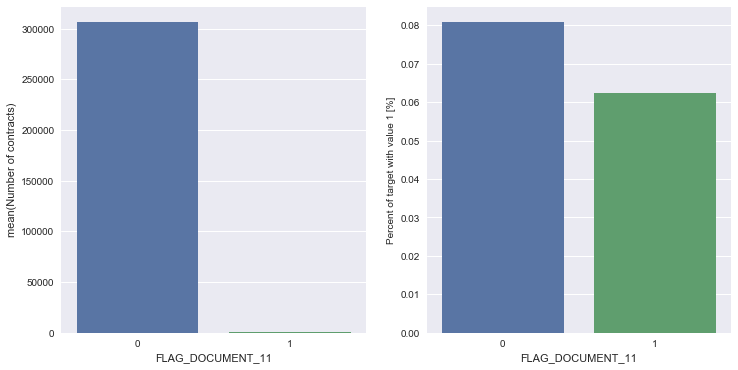

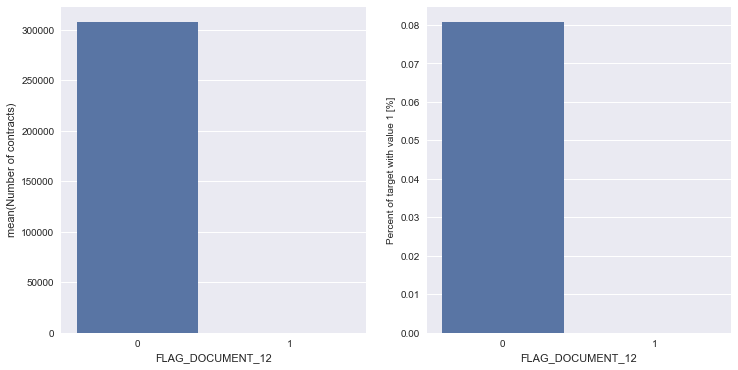

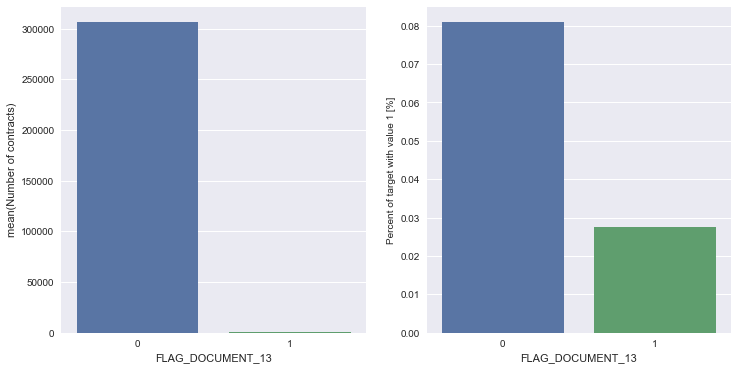

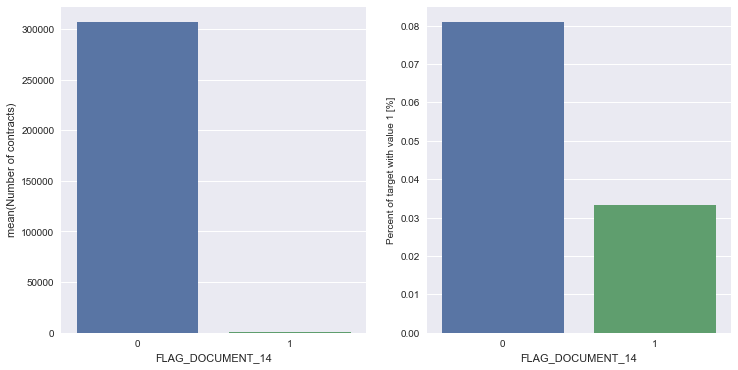

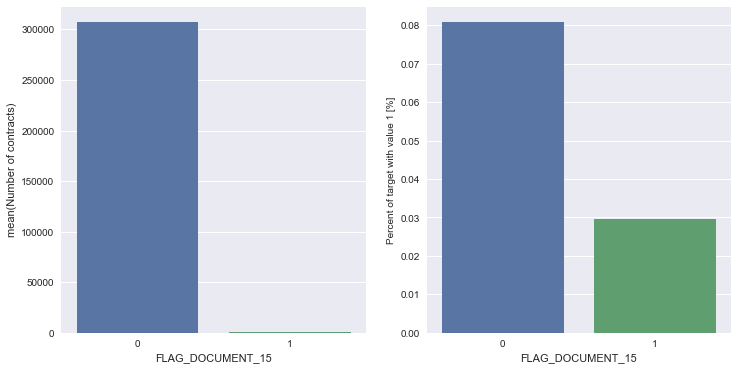

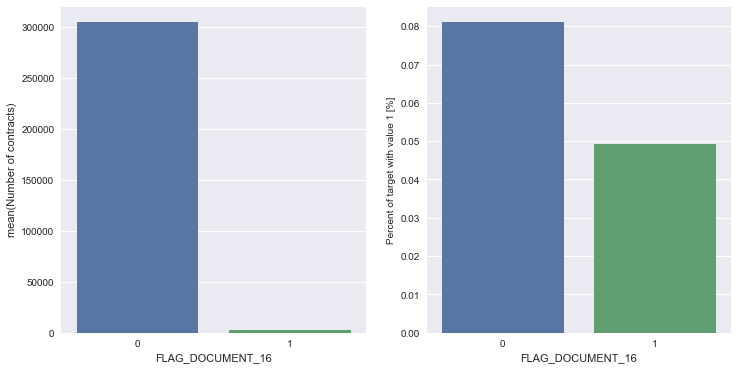

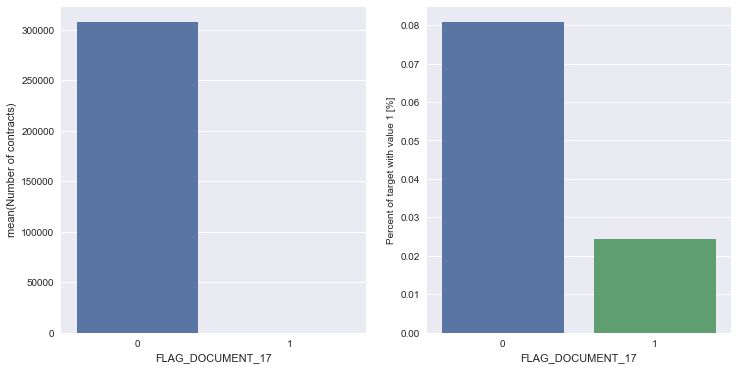

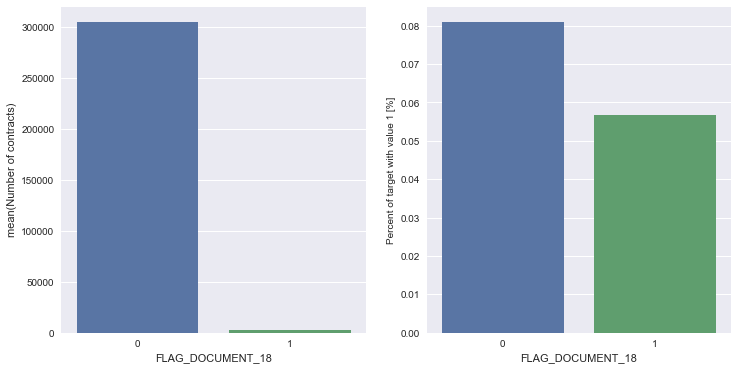

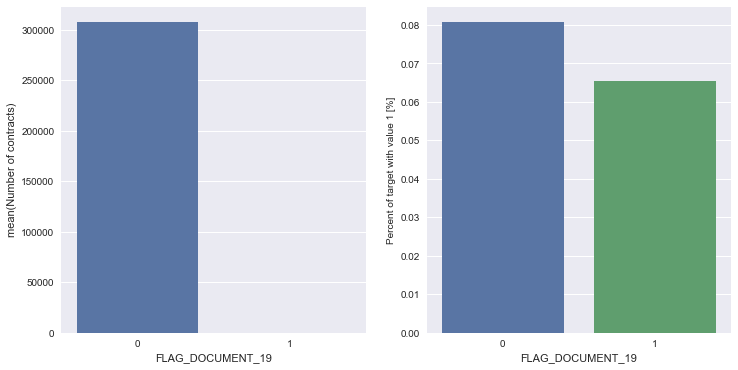

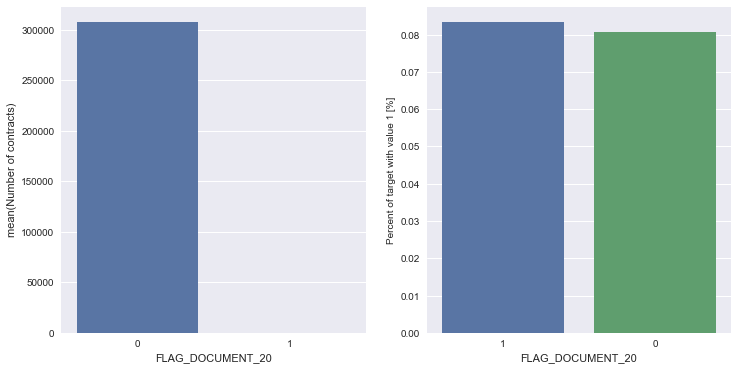

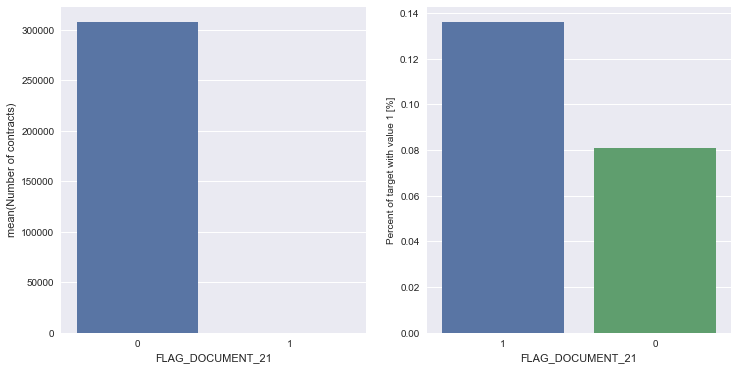

In [55]:
for i in flag:
    plot_stats(i)

In [56]:
amt = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

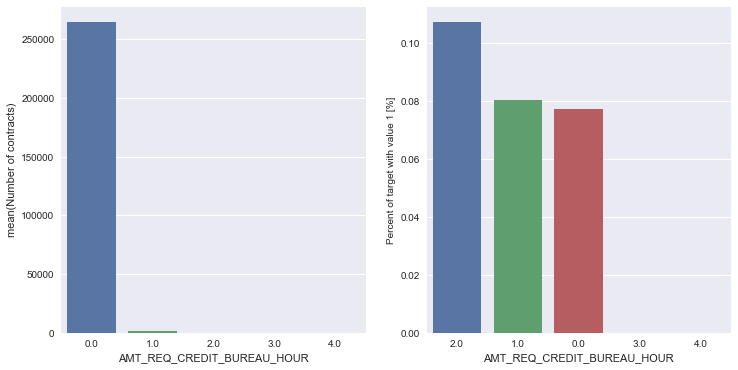

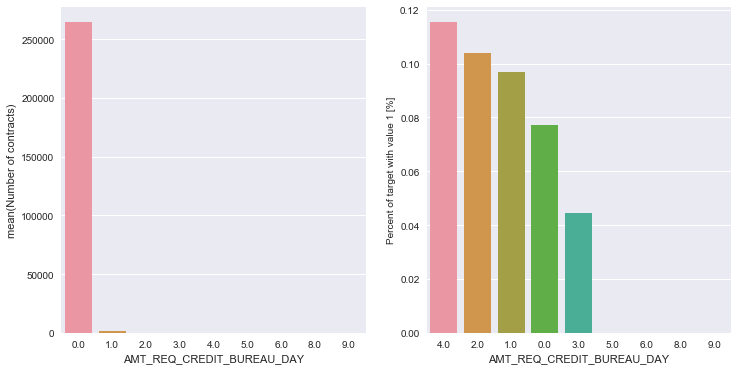

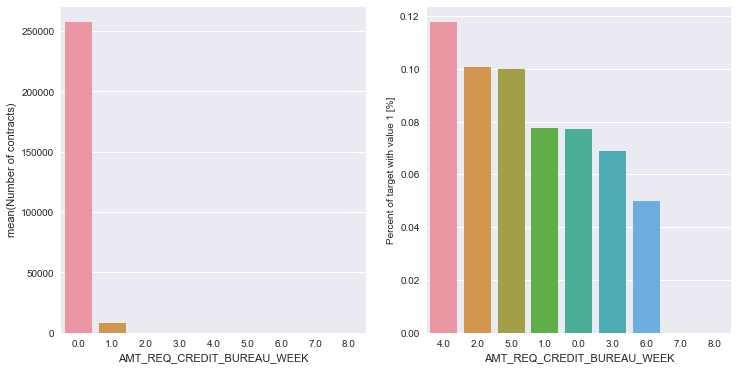

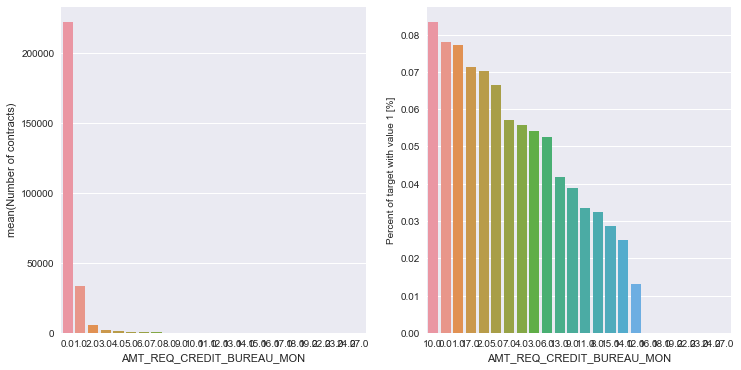

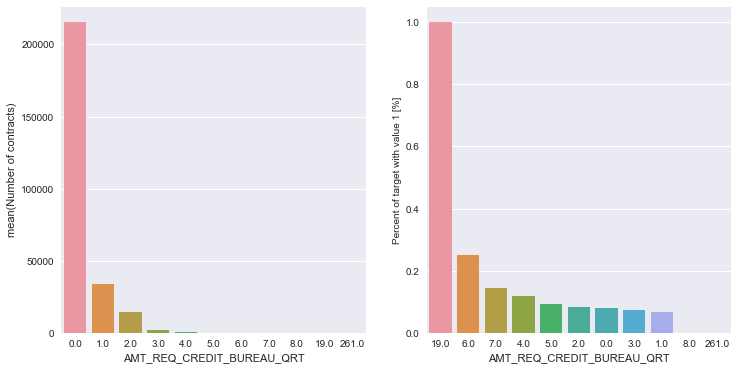

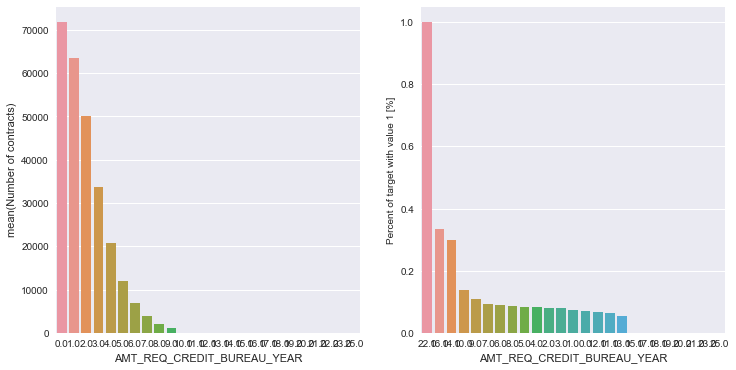

In [57]:
for i in amt:
    plot_stats(i)